In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
path = 'winter2summer_stats'

In [2]:
w_bins = np.loadtxt(path+'/w_bins.txt')
w_freq = np.loadtxt(path+'/w_freq.txt')
act_bins = np.loadtxt(path+'/act_G_bins.txt')
act_freq = np.loadtxt(path+'/act_G_freq.txt')
print (w_bins[0])
w_bins = (w_bins[:,:-1] + w_bins[:,1:] )/2.0
act_bins = (act_bins[:,:-1] + act_bins[:,1:] )/2.0
print (w_bins[0])
new_column = w_bins[:,len(w_bins[0])-1] + (w_bins[:,len(w_bins[0])-1] - w_bins[:,len(w_bins[0])-2])
w_bins = np.append(w_bins, new_column.reshape(-1,1), axis=1)
w_freq = np.append(w_freq, np.array([0]*len(w_bins)).reshape(-1,1), axis=1)

new_column = act_bins[:,len(act_bins[0])-1] + (act_bins[:,len(act_bins[0])-1] - act_bins[:,len(act_bins[0])-2])
act_bins = np.append(act_bins, new_column.reshape(-1,1), axis=1)
act_freq = np.append(act_freq, np.array([0]*len(act_bins)).reshape(-1,1), axis=1)
print (w_bins[0])
print (w_freq[0])
print (act_freq.shape)


[-17.548767   -16.68923    -15.829695   -14.970159   -14.110622
 -13.251086   -12.39155    -11.532014   -10.672477    -9.812941
  -8.953404    -8.093868    -7.234332    -6.374796    -5.5152597
  -4.6557236   -3.7961874   -2.936651    -2.0771148   -1.2175785
  -0.35804233]
[-17.1189985  -16.2594625  -15.399927   -14.5403905  -13.680854
 -12.821318   -11.961782   -11.1022455  -10.242709    -9.3831725
  -8.523636    -7.6641      -6.804564    -5.94502785  -5.08549165
  -4.2259555   -3.3664192   -2.5068829   -1.64734665  -0.78781041]
[-17.1189985  -16.2594625  -15.399927   -14.5403905  -13.680854
 -12.821318   -11.961782   -11.1022455  -10.242709    -9.3831725
  -8.523636    -7.6641      -6.804564    -5.94502785  -5.08549165
  -4.2259555   -3.3664192   -2.5068829   -1.64734665  -0.78781041
   0.07172582]
[1.000e+00 0.000e+00 2.000e+00 2.000e+00 6.000e+00 8.000e+00 1.900e+01
 4.100e+01 7.400e+01 1.280e+02 2.220e+02 4.240e+02 7.320e+02 1.214e+03
 1.869e+03 2.354e+03 1.460e+03 5.760e+02 2.420e

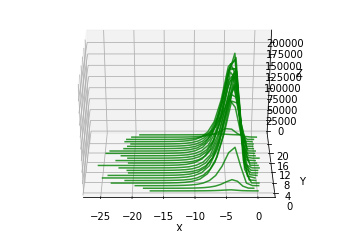

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
yticks = list(range(len(w_bins)))
for k in yticks:
    ax.plot(w_bins[k], w_freq[k], zs=k, zdir='y', color='green', alpha=0.8)
    #ax.bar(w_bins[k][:-1], w_freq[k], zs=k, zdir='y',color='green', width=np.diff(w_bins[k]), alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks[::4])
ax.view_init(azim=-90)
plt.show()   
fig.savefig(path+'/'+path+'_w_hist_3d.pdf')  

<Figure size 432x288 with 0 Axes>

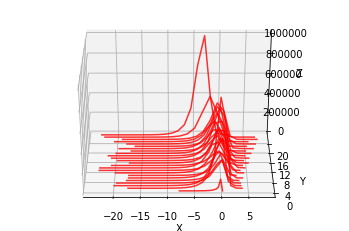

In [4]:
plt.clf() 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
yticks = list(range(len(w_bins)))
for k in yticks:
    ax.plot(act_bins[k], act_freq[k], zs=k, zdir='y', color='red', alpha=0.8)
                              
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks[::4])
ax.view_init(azim=-90)
plt.show() 
fig.savefig(path+'/'+path+'_act_hist.pdf')  

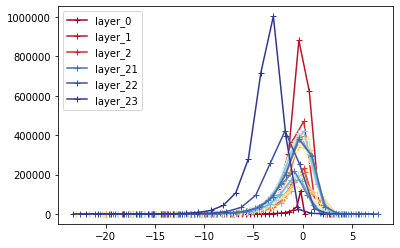

In [5]:
plt.clf() 
import matplotlib.cm as cm
colors = cm.RdYlBu(np.linspace(0, 1, len(w_bins)))

for i in range(len(w_bins)):
    if (i<=2 or i >= len(w_bins)-3):
        plt.plot(w_bins[i], w_freq[i],marker="+", color=colors[i], label="layer_"+str(i))
    else :
        plt.plot(w_bins[i], w_freq[i],marker="+", color=colors[i])
        
plt.legend(loc="upper left", ncol=1)
plt.savefig(path+'/'+path+'_w_2d.pdf') ##wrong naming
    
plt.clf()  

colors = cm.RdYlBu(np.linspace(0, 1, len(act_bins)))

for i in range(len(act_bins)):
    if (i<=2 or i >= len(act_bins)-3):
        plt.plot(act_bins[i], act_freq[i],marker="+", color=colors[i], label="layer_"+str(i))
    else :
        plt.plot(act_bins[i], act_freq[i],marker="+", color=colors[i])
        
plt.legend(loc="upper left", ncol=1)
plt.savefig(path+'/'+path+'_act_2d.pdf') ##wrong naming
    